# Scipy `stats` package

A variety of functionality for dealing with random numbers can be found in the `scipy.stats` package.  
* [`scipy.stats` tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html)
* [`scipy.stats` reference](https://docs.scipy.org/doc/scipy/reference/stats.html)

In [12]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

## Distributions

There are over 100 continuous (univariate) distributions and about 15 discrete distributions provided by scipy
* [continuous distributions](https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous.html)
* [discrete distributions](https://docs.scipy.org/doc/scipy/reference/tutorial/stats/discrete.html)

To avoid confusion with a norm in linear algebra we'll import `stats.norm` as `normal`

In [3]:
from scipy.stats import norm as normal

A normal distribution with mean $\mu$ and variance $\sigma^2$ has a probability density function 
\begin{equation}
\frac{1}{\sigma \sqrt{2\pi}} e^{-(x-\mu)^2 / 2\sigma^2}
\end{equation}

In [5]:
# bounds of the distribution accessed using fields a and b
normal.a, normal.b

(-inf, inf)

In [11]:
# mean and variance
normal.mean(), normal.var()

(0.0, 1.0)

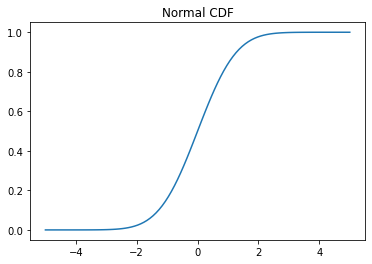

In [15]:
# Cumulative distribution function (CDF)
x = np.linspace(-5,5,100)
y = normal.cdf(x)
plt.plot(x, y)
plt.title('Normal CDF');

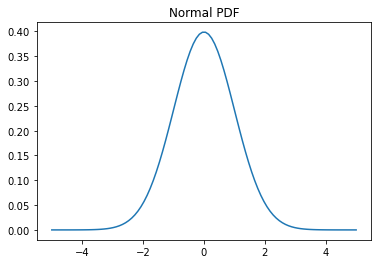

In [16]:
# Probability density function (PDF)
x = np.linspace(-5,5,100)
y = normal.pdf(x)
plt.plot(x, y)
plt.title('Normal PDF');

You can sample from a distribution using the `rvs` method (random variates)

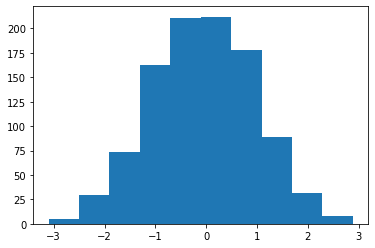

In [19]:
X = normal.rvs(size=1000)
plt.hist(X);

You can set a global random state using `np.random.seed` or by passing in a `random_state` argument to `rvs`

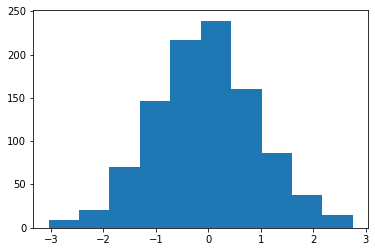

In [20]:
X = normal.rvs(size=1000, random_state=0)
plt.hist(X);

To shift and scale any distribution, you can use the `loc` and `scale` keyword arguments

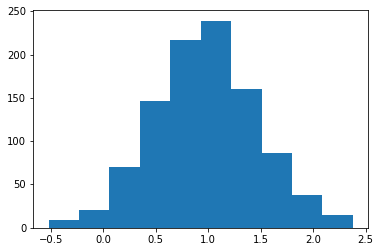

In [21]:
X = normal.rvs(size=1000, random_state=0, loc=1.0, scale=0.5)
plt.hist(X);

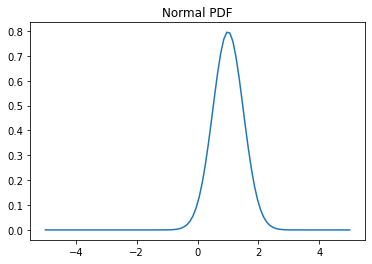

In [22]:
# Probability density function (PDF)
x = np.linspace(-5,5,100)
y = normal.pdf(x, loc=1.0, scale=0.5)
plt.plot(x, y)
plt.title('Normal PDF');

You can also "freeze" a distribution so you don't need to keep passing in the parameters

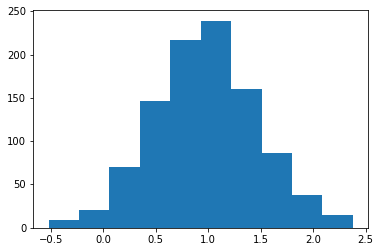

In [23]:
dist = normal(loc=1.0, scale=0.5)
X = dist.rvs(size=1000, random_state=0)
plt.hist(X);

### Example: The Laplace Distribution

We'll review some of the methods we saw above on the [Laplace distribution](https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous_laplace.html), which has a PDF
\begin{equation}
\frac{1}{2}e^{-|x|}
\end{equation}

In [25]:
from scipy.stats import laplace

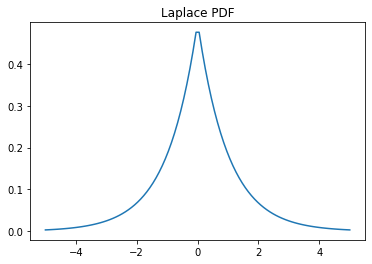

In [27]:
x = np.linspace(-5,5,100)
y = laplace.pdf(x)
plt.plot(x, y)
plt.title('Laplace PDF');

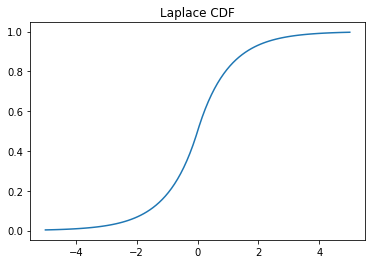

In [29]:
x = np.linspace(-5,5,100)
y = laplace.cdf(x)
plt.plot(x, y)
plt.title('Laplace CDF');

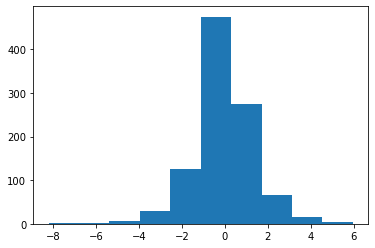

In [31]:
X = laplace.rvs(size=1000)
plt.hist(X);

In [32]:
laplace.a, laplace.b

(-inf, inf)

In [33]:
laplace.mean(), laplace.var()

(0.0, 2.0)

### Discrete Distributions

Discrete distributions have many of the same methods as continuous distributions.  One notable difference is that they have a probability mass function (PMF) instead of a PDF.

We'll look at the [Poisson distribution](https://docs.scipy.org/doc/scipy/reference/tutorial/stats/discrete_poisson.html) as an example

In [38]:
from scipy.stats import poisson
dist = poisson(1) # parameter 1

In [50]:
dist.a, dist.b

(0, inf)

In [51]:
dist.mean(), dist.var()

(1.0, 1.0)

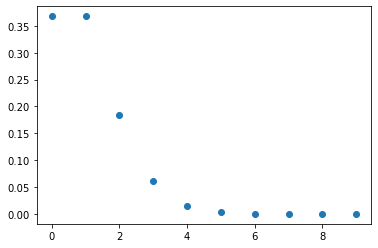

In [45]:
x = np.arange(10)
y = dist.pmf(x)
plt.scatter(x, y);

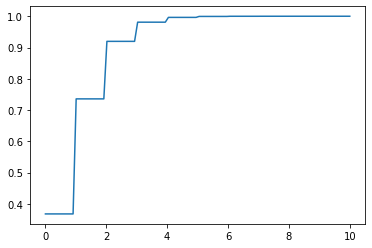

In [47]:
x = np.linspace(0,10, 100)
y = dist.cdf(x)
plt.plot(x, y);

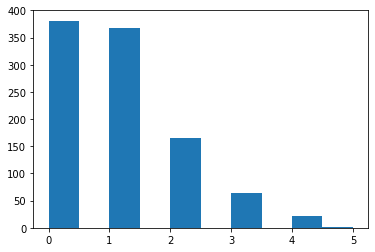

In [48]:
X = dist.rvs(size=1000)
plt.hist(X);

## Fitting Parameters

You can fit distributions using maximum likelihood estimates

In [61]:
X = normal.rvs(size=100, random_state=0)

In [62]:
normal.fit_loc_scale(X)

(0.059808015534485, 1.0078822447165796)

### Statistical Tests

You can also perform a variety of tests.  A list of tests available in scipy available can be found [here](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests).

the t-test tests whether the mean of a sample differs significantly from the expected mean

In [63]:
stats.ttest_1samp(X, 0)

Ttest_1sampResult(statistic=0.5904283402851698, pvalue=0.5562489158694675)

The p-value is 0.56, so we would expect to see a sample that deviates from the expected mean at least this much in about 56% of experiments.  If we're doing a hypothesis test, we wouldn't consider this significant unless the p-value were much smaller (e.g. 0.05)

If we want to test whether two samples could have come from the same distribution, we can use a Kolmogorov-Smirnov (KS) 2-sample test

In [71]:
X0 = normal.rvs(size=1000, random_state=0, loc=5)
X1 = normal.rvs(size=1000, random_state=2, loc=5)

stats.ks_2samp(X0, X1)

KstestResult(statistic=0.023, pvalue=0.9542189106778983)

We see that the two samples are very likely to come from the same distribution

In [74]:
X0 = normal.rvs(size=1000, random_state=0)
X1 = laplace.rvs(size=1000, random_state=2)

stats.ks_2samp(X0, X1)

KstestResult(statistic=0.056, pvalue=0.08689937254547132)

When we draw from a different distribution, the p-value is much smaller, indicating that the samples are less likely to have been drawn from the same distribution.

### Kernel Density Estimation

We might also want to estimate a continuous PDF from samples, which can be accomplished using a [Gaussian kernel density estimator (KDE)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html#scipy.stats.gaussian_kde)

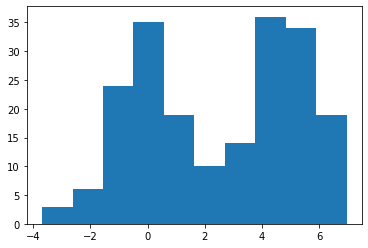

In [77]:
X = np.hstack((laplace.rvs(size=100), normal.rvs(size=100, loc=5)))
plt.hist(X);

A KDE works by creating a function that is the sum of Gaussians centered at each data point.  In Scipy this is implemented as an object which can be called like a function

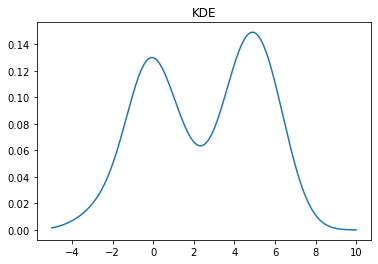

In [80]:
kde = stats.gaussian_kde(X)
x = np.linspace(-5,10,500)
y = kde(x)
plt.plot(x, y)
plt.title("KDE");

We can change the bandwidth of the Gaussians used in the KDE using the `bw_method` parameter.  You can also pass a function that will set this algorithmically.  In the above plot, we see that the peak on the left is a bit smoother than we would expect for the Laplace distribution.  We can decrease the bandwidth parameter to make it look sharper:

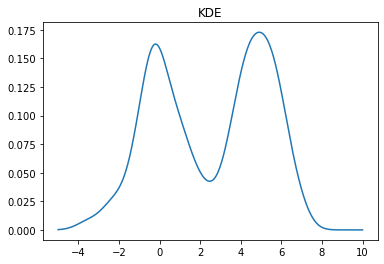

In [82]:
kde = stats.gaussian_kde(X, bw_method=0.2)
x = np.linspace(-5,10,500)
y = kde(x)
plt.plot(x, y)
plt.title("KDE");

If we set the bandwidth too small, then the KDE will look a bit rough.

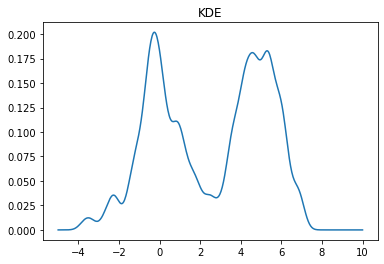

In [83]:
kde = stats.gaussian_kde(X, bw_method=0.1)
x = np.linspace(-5,10,500)
y = kde(x)
plt.plot(x, y)
plt.title("KDE");